## Visualizing spherical harmonics properly

In [1]:
import numpy as np
from numpy import random
from scipy import linalg as lg
from scipy.special import sph_harm as Y
import pylab as plt
from scipy.constants import c, pi
from numpy import sin, cos, array

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
import matplotlib.cm as cm    
import matplotlib.tri as mtri

### How chemists represent spherical harmonics: 3D radar plots

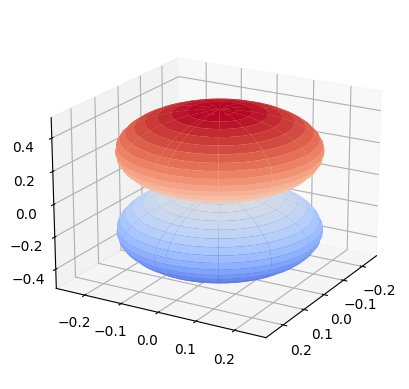

In [2]:
def Ylm(m,n,theta,phi):
    return Y(n,m,phi,theta) 

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

phi = np.linspace(0, 2*np.pi, 50)
theta = np.linspace(0, np.pi, 80)
Phi,Theta = np.meshgrid(phi,theta)

radius = np.abs(Ylm(1,0,Theta,Phi))
# note this silly definition, where the radius is proportional to the value of the function

x = radius * np.cos(Phi) * np.sin(Theta)
y = radius * np.sin(Phi) * np.sin(Theta)
z = radius * np.cos(Theta)
    
surf = ax.plot_surface(x,y,z, rstride=2, cstride=4, cmap=cm.coolwarm,
        linewidth=2, antialiased=True)
ax.set_zlim3d(-0.5, 0.5)

# Set camera angle
ax.elev = 20
ax.azim = 30
plt.show()

### A better way to represent spherical harmonics: functions on a sphere

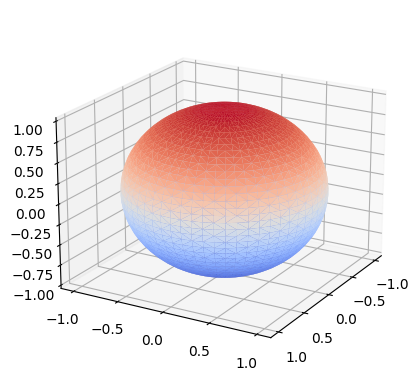

In [3]:
phi = np.linspace(0, 2*np.pi, 60)
theta = np.linspace(0, np.pi, 40)
Phi,Theta = np.meshgrid(phi,theta)

Theta, Phi = Theta.ravel(), Phi.ravel()
triangles = mtri.Triangulation(Theta,Phi).triangles

x = np.cos(Phi) * np.sin(Theta)
y = np.sin(Phi) * np.sin(Theta)
z = np.cos(Theta)
    
# Defining a custom color scalar field
vals = Ylm(1,0,Theta,Phi).real
colors = np.mean(vals[triangles], axis=1)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
triang = mtri.Triangulation(x, y, triangles)
collec = ax.plot_trisurf(triang, z, cmap=cm.coolwarm,linewidth=0)
collec.set_array(colors)
collec.autoscale()
ax.elev = 20
ax.azim = 30
plt.show()